# Práctica 2

## Preparación de entorno

In [1]:
import numpy as np
import keras as ker
import matplotlib.pyplot as plt 

## SETUP

### Variables a definir

In [2]:
entradas = np.array([[0,0],[0,1],[1,0],[1,1]]) # Las cuatro posibles entradas de XOR
esperadas = np.array([[0],[1],[1],[0]]) # Las cuatro posibles salidas de XOR. En este caso es necesario definirlas para para luego meterlas en el modelo MLP
nNeuronasCapaOculta = 16 # Tocar
Epoch = 500 # Tocar
automatizar = True # Si se desea activar el automatizador True

def validar_neuronas_oculta(M,N,n): # Empleamos esta funcion para validar que las neuronas de la capa oculta cumplen con la regla aprendida en clase
    # La regla a validar es (M/2N < n < 2M/N)
    # Siendo M: ejemplos de entrenamiento // N: neuronas de entrada // n: neuronas de la capa oculta

    if((M/(2*N)) < n and n < ((2*M)/N)):
        return print("Neuronas de la capa oculta cumple regla") # validamos
    return print("Neuronas de la capa oculta no cumple regla")

#validar_neuronas_oculta(4,2,nNeuronasCapaOculta)

### Creación y ajuste de la red

In [16]:
def initRed(nNeuronasCapaOculta):
    # En este caso se nos pide realizar un modelo fully connected y secuencial. La API Keras no proporciona una clase concoida como Sequential()
    # De esta manera podemos crear un modelo secuencial que automaticamente esta fully connected.
    # Para crear este modelo tenemos que ir agregando capas, stackeandolas.

    MLP = ker.Sequential() # Creamos el modelo vacío
    # Añadimos una capa (tecnicamente dos, la de entrada (con la variable input_dim) y la oculta)
    MLP.add(ker.layers.Dense(nNeuronasCapaOculta, input_dim = 2, activation='relu'))
    # Añadimos la capa de salida, con una única neurona. EN este caso el input no hace falta porque ya asume que son las neuronas de capa oculta, ya
    # que las capas se stackean
    MLP.add(ker.layers.Dense(1,activation='relu')) 

    # Por último tenemos que configurar el modelo antes de entrenarlo con lo dicho en el enunciado
    # Optimizador: Adam
    # Función error: Mean Squared Error
    # Metricas = Binary accuracy porque nos da el número de precisión de la red
    MLP.compile(optimizer='adam',loss='mean_squared_error',metrics=["binary_accuracy"])
    return MLP


### Entrenamiento de la red

In [4]:
def Entrenar(MLP,Epoch):
    # Por último entrenamos la red con el epoch (nº iteraciones)
    output_fit = MLP.fit(entradas,esperadas,epochs=Epoch,verbose = 0) 
    return output_fit,MLP

### Calidad de la red

In [5]:
def PintarLossAccuracy(output_fit):
    print(output_fit.history.keys())
    # Pintamos las tanto la loss como la accuracy
    plt.plot(output_fit.history['loss'])
    plt.plot(output_fit.history['binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Error', 'Exactitud'], loc='lower left')
    plt.show()

def EvalCalidad(MLP):
    # Evaluamos el modelo
    print("Datos evaluados")
    evaluar = MLP.evaluate(entradas, esperadas)
    print("Error, Exactitud:", evaluar)
    return evaluar

# Evaluacion de datos en la automatización de los datos
def EvalCalidadAuto(MLP):
    return MLP.evaluate(entradas,esperadas,verbose=0)

### Prueba de la red

In [10]:
def PruebaRed(MLP,neurona,perido):
    # Una vez tenemos entrenada la red, probamos todas las entradas y vemos si funciona
    i = 0
    resultados = MLP.predict(entradas).round()
    print("================ VALORES XOR ================")
    for entrada in entradas:
        error = (entrada[0]  ^ entrada[1]) - resultados[i]
        print(neurona,';',perido,';',resultados[i],';',int(error))
        i += 1

In [7]:
def PruebaRed(MLP,neurona,perido,errror):
    # Una vez tenemos entrenada la red, probamos todas las entradas y vemos si funciona
    i = 0
    resultados = MLP.predict(entradas).round()
    print("================ VALORES XOR ================")
    for entrada in entradas:
        print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] ^ entrada[1]) ," OBTENIDO ->", resultados[i])
        i += 1

In [8]:
if not automatizar:
    validar_neuronas_oculta(4,2,nNeuronasCapaOculta)
    MLP = initRed(nNeuronasCapaOculta)
    output_fit,MLP = Entrenar(MLP,Epoch)
    PintarLossAccuracy(output_fit)
    MLP = EvalCalidad(MLP)
    PruebaRed(MLP)

================ VALORES XOR ================
2 ; 525 ; [0.] ; 0
2 ; 525 ; [0.] ; 1
2 ; 525 ; [1.] ; 0
2 ; 525 ; [0.] ; 0
================ VALORES XOR ================
3 ; 525 ; [0.] ; 0
3 ; 525 ; [0.] ; 1
3 ; 525 ; [1.] ; 0
3 ; 525 ; [0.] ; 0
================ VALORES XOR ================
4 ; 525 ; [0.] ; 0
4 ; 525 ; [0.] ; 1
4 ; 525 ; [0.] ; 1
4 ; 525 ; [0.] ; 0
================ VALORES XOR ================
5 ; 525 ; [0.] ; 0
5 ; 525 ; [1.] ; 0
5 ; 525 ; [0.] ; 1
5 ; 525 ; [0.] ; 0
================ VALORES XOR ================
6 ; 525 ; [0.] ; 0
6 ; 525 ; [1.] ; 0
6 ; 525 ; [0.] ; 1
6 ; 525 ; [0.] ; 0
================ VALORES XOR ================
7 ; 525 ; [0.] ; 0
7 ; 525 ; [0.] ; 1
7 ; 525 ; [0.] ; 1
7 ; 525 ; [0.] ; 0
================ VALORES XOR ================
8 ; 525 ; [0.] ; 0
8 ; 525 ; [1.] ; 0
8 ; 525 ; [1.] ; 0
8 ; 525 ; [0.] ; 0
================ VALORES XOR ================
9 ; 525 ; [0.] ; 0
9 ; 525 ; [1.] ; 0
9 ; 525 ; [0.] ; 1
9 ; 525 ; [0.] ; 0
================ VALORES

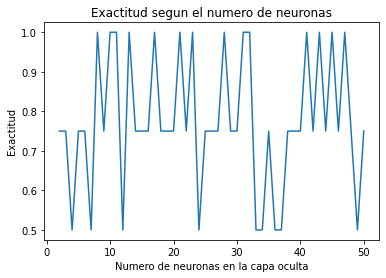

In [17]:
if(automatizar):
    nNeuronasCapaOculta = [i for i in range(2,51)]
    Epoch = [i for i in range(50,1001,25)]
    precision = 5
    # Primero empezamos a buscar la capa oculta usando la lista nNeuronasCapaOculta. Los resultados se guardaran en outputErr
    err = []
    ex = []
    outputErrN = [err,ex]
    for neurona in nNeuronasCapaOculta:
        # Vuelvo a inicializar estas variables para guardar los errores y hacer la media en cada iteracion
        err = []
        ex = []
        # Doy PRECISION numero de vueltas para que los valores aleatorios no afecten mucho en nuestro estudio
        for i in range(precision):
            print("Probando neurona:",neurona,end="\r")
            MLP = initRed(neurona)
            output_fit,MLP = Entrenar(MLP,Epoch[int(len(Epoch)/2)])
            error,exact = EvalCalidadAuto(MLP)
            err.append(error)
            ex.append(exact)
        PruebaRed(MLP,neurona,Epoch[int(len(Epoch)/2)])
        outputErrN[0].append(np.mean(err))
        outputErrN[1].append(np.mean(exact))

    # Ahora pintamos la grafica para ver el error y la precisión
    plt.title('Exactitud segun el numero de neuronas')
    #plt.plot(nNeuronasCapaOculta,outputErrN[0])
    plt.plot(nNeuronasCapaOculta,outputErrN[1])
    #plt.legend(['Error', 'Exactitud'], loc='center right')
    plt.ylabel('Exactitud')
    plt.xlabel('Numero de neuronas en la capa oculta')
    plt.show()


================ VALORES XOR ================
10 ; 50 ; [0.] ; 0
10 ; 50 ; [1.] ; 0
10 ; 50 ; [0.] ; 1
10 ; 50 ; [1.] ; -1
================ VALORES XOR ================
10 ; 75 ; [1.] ; -1
10 ; 75 ; [1.] ; 0
10 ; 75 ; [1.] ; 0
10 ; 75 ; [0.] ; 0
================ VALORES XOR ================
10 ; 100 ; [1.] ; -1
10 ; 100 ; [0.] ; 1
10 ; 100 ; [1.] ; 0
10 ; 100 ; [1.] ; -1
================ VALORES XOR ================
10 ; 125 ; [0.] ; 0
10 ; 125 ; [0.] ; 1
10 ; 125 ; [0.] ; 1
10 ; 125 ; [0.] ; 0
================ VALORES XOR ================
10 ; 150 ; [0.] ; 0
10 ; 150 ; [1.] ; 0
10 ; 150 ; [0.] ; 1
10 ; 150 ; [1.] ; -1
================ VALORES XOR ================
10 ; 175 ; [1.] ; -1
10 ; 175 ; [1.] ; 0
10 ; 175 ; [1.] ; 0
10 ; 175 ; [0.] ; 0
================ VALORES XOR ================
10 ; 200 ; [1.] ; -1
10 ; 200 ; [0.] ; 1
10 ; 200 ; [1.] ; 0
10 ; 200 ; [0.] ; 0
================ VALORES XOR ================
10 ; 225 ; [0.] ; 0
10 ; 225 ; [1.] ; 0
10 ; 225 ; [0.] ; 1
10 ; 225 ; [1

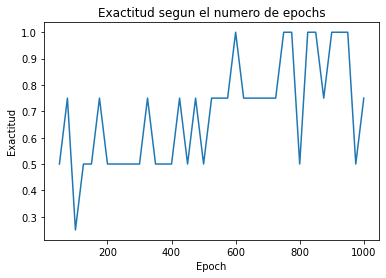

In [15]:
if(automatizar):
    nNeuronasCapaOculta = 10
    Epoch = [i for i in range(50,1001,25)]
    precision = 5
    # Primero empezamos a buscar la capa oculta usando la lista nNeuronasCapaOculta. Los resultados se guardaran en outputErr
    err = []
    ex = []
    outputErr = [err,ex]
    for e in Epoch:
        # Vuelvo a inicializar estas variables para guardar los errores y hacer la media en cada iteracion
        err = []
        ex = []
        # Doy PRECISION numero de vueltas para que los valores aleatorios no afecten mucho en nuestro estudio
        for i in range(precision):
            print("Probando epoch:",e,end="\r")
            MLP = initRed(nNeuronasCapaOculta)
            output_fit,MLP = Entrenar(MLP,e)
            error,exact = EvalCalidadAuto(MLP)
            err.append(error)
            ex.append(exact)
        outputErr[0].append(np.mean(err))
        outputErr[1].append(np.mean(exact))
        PruebaRed(MLP,10,e)
    # Ahora pintamos la grafica para ver el error y la precisión
    plt.title('Exactitud segun el numero de epochs')
    #plt.plot(Epoch,outputErr[0])
    plt.plot(Epoch,outputErr[1])
    #plt.legend(['Error', 'Exactitud'], loc='center right')
    plt.ylabel('Exactitud')
    plt.xlabel('Epoch')
    plt.show()